### Word2vec

Сегодня мы научимся работать с word2vec моделями. Загрузим и потестим предобученную, посмотрим, какие крутые свойства и функции у нее бывают, обучим свою модель и с помощью нее улучшим качество кластеризации(и/или классификации) текстов

Установим все необходимое

#### Скачаем rucorpora 15 с диска https://yadi.sk/d/fLRMFhm03Pbs98

In [1]:
# Прописываем путь до файла
#path_to_ruscorpora = <Ваш код>
path_to_ruscorpora = 'ruscorpora.model.bin'

Импортируем нужные библиотеки

In [1]:
from gensim.models import Word2Vec
import pandas as pd
from tqdm import tqdm
import gensim

Шапка для картинок

In [2]:
import matplotlib.pyplot as plt
# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
plt.style.use('default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)


import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)# для встроенных картинок


Populating the interactive namespace from numpy and matplotlib


Сначала познакомимся с уже готовой реализацией word2vec на gensim

#### Загрузим обученную на ruscorpora модель word2vec

In [30]:
model_word2vec = gensim.models.KeyedVectors.load_word2vec_format(path_to_ruscorpora, binary = True)

In [31]:
model_word2vec.vocab

{'это': <gensim.models.keyedvectors.Vocab at 0x7effb8bc18d0>,
 'весь': <gensim.models.keyedvectors.Vocab at 0x7effb8bc1748>,
 'человек': <gensim.models.keyedvectors.Vocab at 0x7effb8bc17b8>,
 'мочь': <gensim.models.keyedvectors.Vocab at 0x7effb8bc1940>,
 'год': <gensim.models.keyedvectors.Vocab at 0x7effb8bc1978>,
 'сказать': <gensim.models.keyedvectors.Vocab at 0x7effb8bc19b0>,
 'время': <gensim.models.keyedvectors.Vocab at 0x7effb8bc17f0>,
 'говорить': <gensim.models.keyedvectors.Vocab at 0x7effb8bc1828>,
 'становиться': <gensim.models.keyedvectors.Vocab at 0x7effb8bc1198>,
 'знать': <gensim.models.keyedvectors.Vocab at 0x7effb8bc1080>,
 'самый': <gensim.models.keyedvectors.Vocab at 0x7effb8bc1860>,
 'жизнь': <gensim.models.keyedvectors.Vocab at 0x7effb8bc1898>,
 'дело': <gensim.models.keyedvectors.Vocab at 0x7effb8bc19e8>,
 'день': <gensim.models.keyedvectors.Vocab at 0x7effb8bc1a20>,
 'рука': <gensim.models.keyedvectors.Vocab at 0x7effb8bc1a58>,
 'первый': <gensim.models.keyedvecto

#### Посмотрим, как с ней обращаться

Можно посмотреть наиболее похожие на одни и наиболее непохожие на другие слова. Попробуйте свойтсва векторов word2vec и подумать какие слова нужно послать на вход, чтобы получить на выходе слова "школа",  "машинное", "обучение"

In [42]:
model_word2vec.most_similar(positive=['света', 'дима', 'любовь', 'дети'],  topn=3)

[('галя', 0.40860456228256226),
 ('наташа', 0.38346922397613525),
 ('мама', 0.3727400302886963)]

In [33]:
model_word2vec.most_similar(positive=['света', 'дима'], negative=['любовь'], topn=3)

[('сережа', 0.41812634468078613),
 ('миша', 0.4137137532234192),
 ('женя', 0.38526248931884766)]

In [87]:
model_word2vec.most_similar(positive=['шахтер'], negative=['грязь'], topn=3)

[('горняк', 0.3543156385421753),
 ('ударник', 0.336887001991272),
 ('металлург', 0.3220180869102478)]

In [100]:
model_word2vec.most_similar(positive=['учение', 'тьма'], negative=['свет'], topn=3)

[('мрак', 0.4193800389766693),
 ('догмат', 0.38442569971084595),
 ('философия', 0.38409462571144104)]

Еще есть прикольная функция, которая выводит слово, лишнее в строке. Попробуйте придумать пример, который word2vec не взломает

In [26]:
model_word2vec.doesnt_match("коньяк матан водка пиво".split())

'пиво'

In [58]:
model_word2vec.doesnt_match("света дима игорь".split())

'света'

In [57]:
model_word2vec.doesnt_match("дима игорь вова таня юля аня маша".split())

'игорь'

In [55]:
model_word2vec.doesnt_match("дима аня саша".split())

'дима'

In [53]:
model_word2vec.doesnt_match("джаз рок кантри блюз рок-н-ролл".split())

'кантри'

Функция, которая выводит сходство между словами.  С ее помощью можно понимать значение слова нефть

In [ ]:
print(model_word2vec.similarity('Дима', 'Света'))
print(model_word2vec.similarity('нефть', 'вода'))
print(model_word2vec.similarity('нефть', 'водка'))
print(model_word2vec.similarity('нефть', 'духи'))
print(model_word2vec.similarity('нефть', 'компот'))


Или смотреть, где в России больше нефти

In [49]:
print(model_word2vec.similarity('нефть', 'чечня'))
print(model_word2vec.similarity('нефть', 'якутск'))
print(model_word2vec.similarity('нефть', 'москва'))
print(model_word2vec.similarity('нефть', 'саратов'))
print(model_word2vec.similarity('нефть', 'сибирь'))

0.102318135805
0.0374594075176
0.00765520311232
0.00437990603761
0.0863051911584


### Теперь давайте обучим собственную модель

 В качестве обучающего корпуса возьмем новости по 20 темам

In [5]:
from sklearn.datasets import fetch_20newsgroups
train_all = fetch_20newsgroups(subset='train')
print(train_all.target_names, " - 20 возможных тем")

dataset = fetch_20newsgroups(
    subset='train', 
    categories=['comp.sys.mac.hardware', 'soc.religion.christian', 'rec.sport.hockey'])

dataset.data[0].split()

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']  - 20 возможных тем


['From:',
 'erik@cheshire.oxy.edu',
 '(Erik',
 'Adams)',
 'Subject:',
 'HELP!!',
 'My',
 'Macintosh',
 '"luggable"',
 'has',
 'lines',
 'on',
 'its',
 'screen!',
 'Organization:',
 'Occidental',
 'College,',
 'Los',
 'Angeles,',
 'CA',
 '90041',
 'USA.',
 'Distribution:',
 'comp',
 'Lines:',
 '20',
 'Okay,',
 'I',
 "don't",
 'use',
 'it',
 'very',
 'much,',
 'but',
 'I',
 'would',
 'like',
 'for',
 'it',
 'to',
 'keep',
 'working',
 'correctly,',
 'at',
 'least',
 'as',
 'long',
 'as',
 'Apple',
 'continues',
 'to',
 'make',
 'System',
 'software',
 'that',
 'will',
 'run',
 'on',
 'it,',
 'if',
 'slowly',
 ':-)',
 'Here',
 'is',
 'the',
 'problem:',
 'When',
 'the',
 'screen',
 'is',
 'tilted',
 'too',
 'far',
 'back,',
 'vertical',
 'lines',
 'appear',
 'on',
 'the',
 'screen.',
 'They',
 'are',
 'every',
 '10',
 'pixels',
 'or',
 'so,',
 'and',
 'seem',
 'to',
 'be',
 'affected',
 'somewhat',
 'by',
 'opening',
 'windows',
 'and',
 'pulling',
 'down',
 'menus.',
 'It',
 'looks',
 't

Предобраотаем эти новости. Выкинем цифры, знаки пунктуации, цифры, переведем в нижний регистр, разобьем на слова
Нормализуйте слова, например с помощью модуля nltk (или используйте любой другой способ на ваш выбор)

In [60]:
import string 
def normalize(x):
    dict_rus = ''.join(x)
    translator = str.maketrans({key: ' ' for key in string.punctuation.replace('/', '').replace('-', '') + string.digits + '№'})
    dict_rus =dict_rus.translate(translator).lower()
    x_preprocessed = dict_rus.split()
    #<Ваш код>
    return(x_preprocessed)

In [107]:
# Применяем фунции предобработки к нашим новостям
data_normalized = [normalize(new) for new in tqdm(dataset.data)]

100%|██████████| 1777/1777 [00:00<00:00, 7323.35it/s]


Все, обучающий корпус готов!

In [8]:
# импортируем модули, настраиваем логирование
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = data_normalized
model = gensim.models.Word2Vec(sentences, min_count=1)

2017-11-18 17:55:25,093 : INFO : collecting all words and their counts
2017-11-18 17:55:25,096 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-18 17:55:25,187 : INFO : collected 21478 word types from a corpus of 285064 raw words and 1777 sentences
2017-11-18 17:55:25,189 : INFO : Loading a fresh vocabulary
2017-11-18 17:55:25,275 : INFO : min_count=1 retains 21478 unique words (100% of original 21478, drops 0)
2017-11-18 17:55:25,276 : INFO : min_count=1 leaves 285064 word corpus (100% of original 285064, drops 0)
2017-11-18 17:55:25,362 : INFO : deleting the raw counts dictionary of 21478 items
2017-11-18 17:55:25,364 : INFO : sample=0.001 downsamples 23 most-common words
2017-11-18 17:55:25,365 : INFO : downsampling leaves estimated 276865 word corpus (97.1% of prior 285064)
2017-11-18 17:55:25,366 : INFO : estimated required memory for 21478 words and 100 dimensions: 27921400 bytes
2017-11-18 17:55:25,459 : INFO : resetting layer weights
2017-11-18

In [9]:
model = gensim.models.Word2Vec(size = 300, iter=1)  # Задаем пустую модель, не натренированную
model.build_vocab(sentences)  # Строим словарь
model.train(sentences, total_examples=model.corpus_count, epochs=20)  # Тренируем модель

2017-11-18 17:55:32,123 : INFO : collecting all words and their counts
2017-11-18 17:55:32,125 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-18 17:55:32,237 : INFO : collected 21478 word types from a corpus of 285064 raw words and 1777 sentences
2017-11-18 17:55:32,239 : INFO : Loading a fresh vocabulary
2017-11-18 17:55:32,268 : INFO : min_count=5 retains 7193 unique words (33% of original 21478, drops 14285)
2017-11-18 17:55:32,269 : INFO : min_count=5 leaves 259726 word corpus (91% of original 285064, drops 25338)
2017-11-18 17:55:32,304 : INFO : deleting the raw counts dictionary of 21478 items
2017-11-18 17:55:32,307 : INFO : sample=0.001 downsamples 28 most-common words
2017-11-18 17:55:32,308 : INFO : downsampling leaves estimated 250236 word corpus (96.3% of prior 259726)
2017-11-18 17:55:32,309 : INFO : estimated required memory for 7193 words and 300 dimensions: 20859700 bytes
2017-11-18 17:55:32,353 : INFO : resetting layer weights
2017-1

5004678

In [285]:
model['king'].shape

(300,)

Теперь давайте нарисуем слова из первой новости в нашем новом пространстве

In [10]:
# Берем слова из первой новости, достаем соостветствующие векторы, выбрасываем слова, для которых векторов нет. 
# Подумайте - как так могло получится, что нет векторов?
labels = []
embeddings = []
data_to_tsne = [item for sublist in data_normalized[:20] for item in sublist]
for x in list(set(data_to_tsne)):
    try:
        embeddings.append(model[x])
        labels.append(x)
    except KeyError:
        continue
         

In [11]:
# Пишем функцию, которая будет нам все отрисовывать.
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Сжимаем наше 100-мерное пространство в 2-х мерное
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 1000
low_dim_embs = tsne.fit_transform((embeddings[:plot_only]))


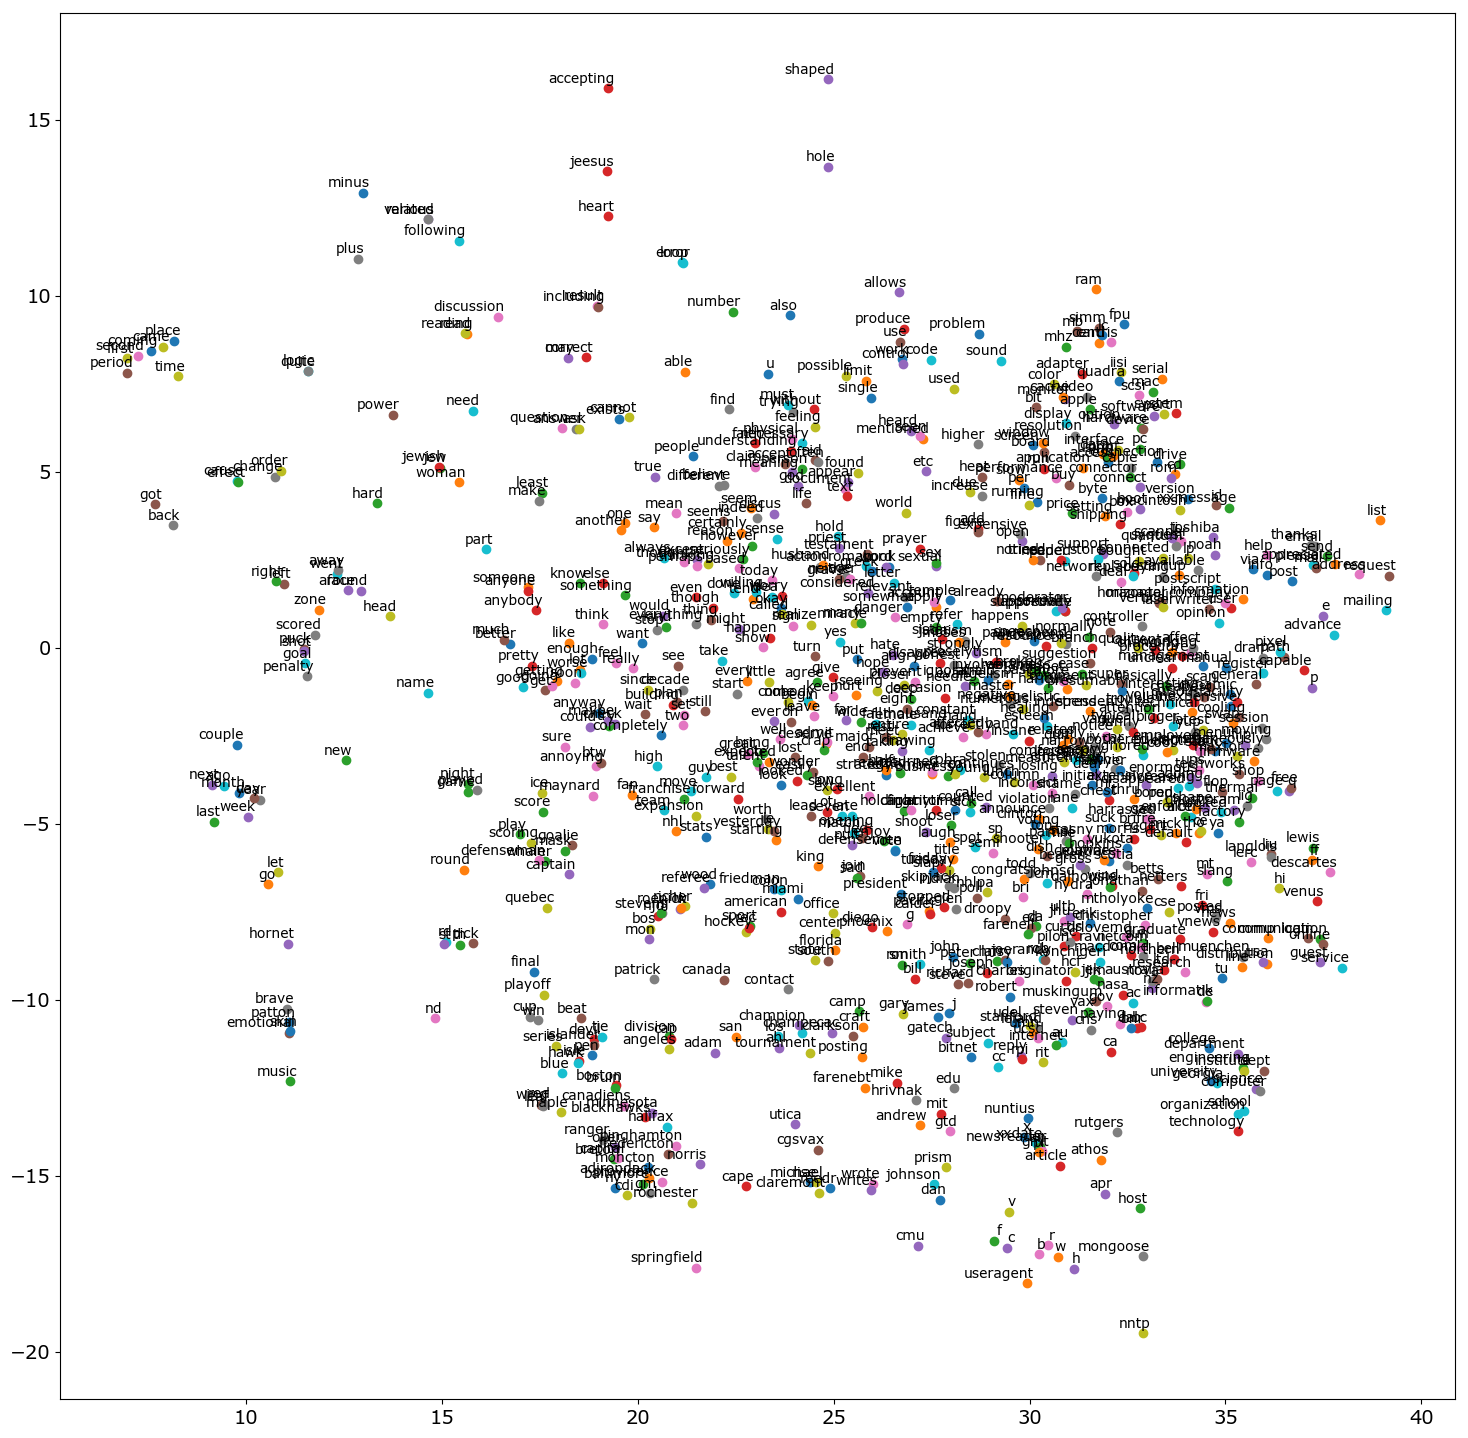

In [13]:
# Рисуем только первые 1000 слов

labels_to_draw = [labels[i] for i in range(min(len(labels),plot_only))]
a = plot_with_labels(low_dim_embs, labels_to_draw)


### Пункт 0
Проделайте аналогичную отрисовку и сжатие векторов для предобученной модели (для этого скачайте бинарник по этой ссылке - https://code.google.com/archive/p/word2vec/ (файл GoogleNews-vectors-negative300) по аналогии с тем, как мы работали с русским корпусом). Сравните результаты

In [14]:
w2v_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True)

2017-11-18 17:56:26,872 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2017-11-18 17:57:20,900 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


In [6]:
import re
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, PorterStemmer, LancasterStemmer
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
wnl = WordNetLemmatizer()
porter = PorterStemmer()
lancaster = LancasterStemmer()

stops = set(stopwords.words("english")) | set(stopwords.words("russian"))
def review_to_wordlist(review):
    #1)
    review_text = re.sub("[^а-яА-ЯёЁa-zA-Z]"," ", review)
    #2)
    words = review_text.lower().split()
    #3)
    words = [w for w in words if not w in stops]
    #4)
    #words = [morph.parse(w)[0].normal_form for w in words ]
    #5)
    words = [wnl.lemmatize(w) for w in words]
    #6)
    #words = [porter.stem(w) for w in words]
    #7)
    #words = [lancaster.stem(w) for w in words]
    #words = ' '.join(words)
    return(words)

In [7]:
# Применяем фунции предобработки к нашим новостям
data_normalized = [review_to_wordlist(new) for new in tqdm(dataset.data)]

100%|██████████| 1777/1777 [00:04<00:00, 391.87it/s]


In [290]:
# Берем слова из первой новости, достаем соостветствующие векторы, выбрасываем слова, для которых векторов нет. 
# Подумайте - как так могло получится, что нет векторов?
labels = []
embeddings = []
data_to_tsne = [item for sublist in data_normalized[:20] for item in sublist]
for x in list(set(data_to_tsne)):
    try:
        embeddings.append(w2v_model[x])
        labels.append(x)
    except KeyError:
        continue
         

In [291]:
# Пишем функцию, которая будет нам все отрисовывать.
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)

In [292]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Сжимаем наше 100-мерное пространство в 2-х мерное
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 1000
low_dim_embs = tsne.fit_transform((embeddings[:plot_only]))


In [119]:
labels[0]

'needed'

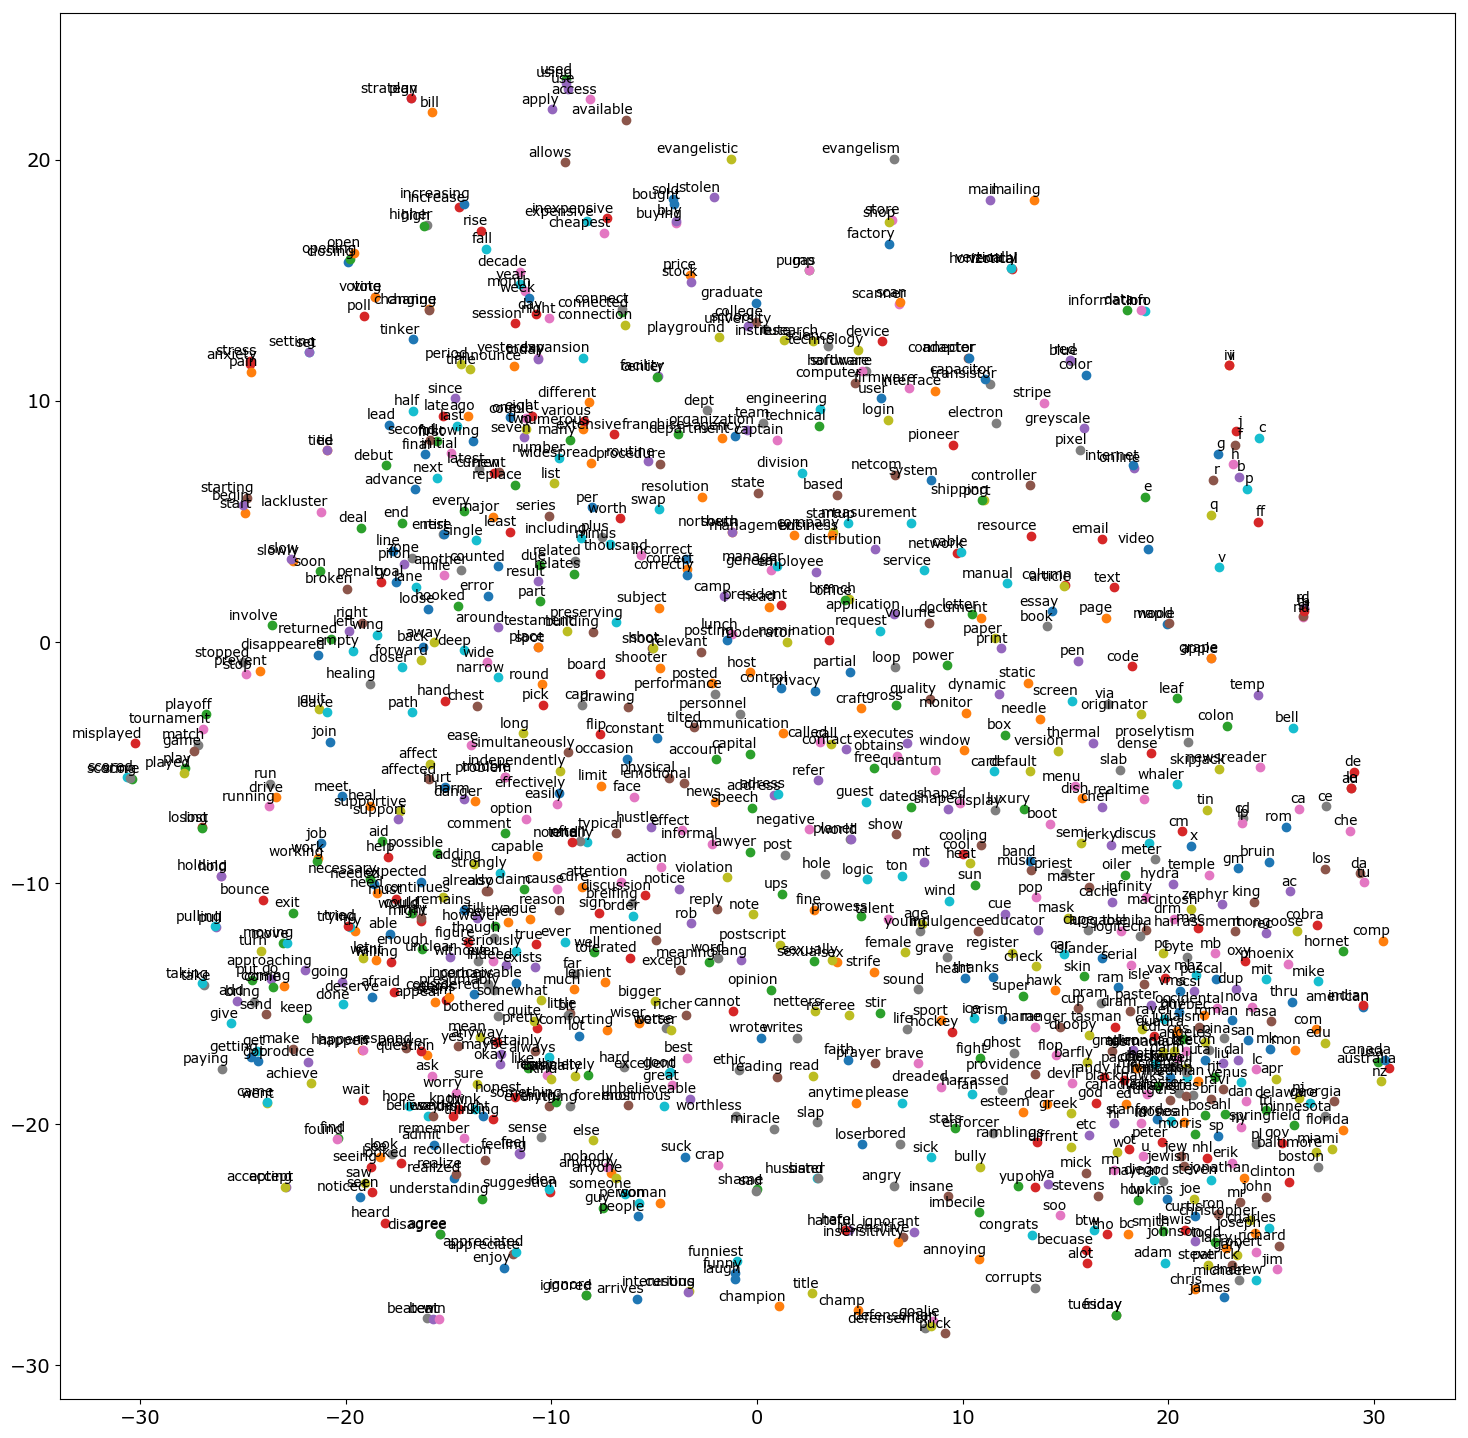

In [293]:
# Рисуем только первые 1000 слов

labels_to_draw = [labels[i] for i in range(min(plot_only, len(labels)))]
a = plot_with_labels(low_dim_embs, labels_to_draw)

### Попробуем с помощью нашей модели улучшить качество кластеризации текстов
Если вы не понимаете, что такое кластеризация - почитать об этом можно по ссылке  - http://scikit-learn.org/stable/modules/clustering.html

Если вам все равно кажется, что это сложно, и вы чувствуете себя более уверено в задаче классификации - вместо задачи кластеризации можно рассматривать задачу классификации - тогда вместо функции quality используйте roc-auc из библиотеки scikit learn, все остальные шаги предобработки и измерения признаков аналогичны

Мерить качество кластеризации будем следующим образом - измерим количество правильных попаданий категории в кластера

In [15]:
import itertools
def quality(preds, target):
    permutations = list(itertools.permutations([0, 1, 2]))
    scores = []
    for a, b, c in permutations:
        mapping = {2 : a, 1: b, 0: c}
        mapped_preds = [mapping[pred] for pred in preds]
        scores.append(float(sum(mapped_preds != target)) / len(target))
    return(1 - min(scores))

### Пункт 1

Кластеризуйте датасет с заданием признаков с помощью one hot encoding - посмотрите на результат

In [16]:
s = set()
for row in data_normalized:
    for word in row:
        s.add(word)

In [17]:
len(s)

21478

In [18]:
len(data_normalized)

1777

In [38]:
morph = pymorphy2.MorphAnalyzer()
wnl = WordNetLemmatizer()
porter = PorterStemmer()
lancaster = LancasterStemmer()

stops = set(stopwords.words("english")) | set(stopwords.words("russian"))
def review_to_text(review):
    #1)
    review_text = re.sub("[^а-яА-ЯёЁa-zA-Z]"," ", review)
    #2)
    words = review_text.lower().split()
    #3)
    words = [w for w in words if not w in stops]
    #4)
    #words = [morph.parse(w)[0].normal_form for w in words ]
    #5)
    words = [wnl.lemmatize(w) for w in words]
    #6)
    #words = [porter.stem(w) for w in words]
    #7)
    #words = [lancaster.stem(w) for w in words]
    words = ' '.join(words)
    return(words)

2017-11-18 18:02:46,822 : INFO : Loading dictionaries from /home/dz/anaconda3/lib/python3.6/site-packages/pymorphy2_dicts/data
2017-11-18 18:02:46,932 : INFO : format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [39]:
# Применяем фунции предобработки к нашим новостям
data_normalized_text = [review_to_text(new) for new in tqdm(dataset.data)]

100%|██████████| 1777/1777 [00:02<00:00, 726.62it/s]


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(data_normalized_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [42]:
Xtr = cv.transform(data_normalized_text)

In [43]:
labels = dataset.target
true_k = np.unique(labels).shape[0]
true_k

3

In [45]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
km.fit(Xtr)
quality(km.labels_, labels)

0.3860438942037141

### Пункт 2
Далее кластеризуем тексты на векторах, полученных из модели, которую мы сами обучили

Напишем функцию, которая делает из предложения вектор - просто складывает вектора всех слов и усредняет. Если слов нет в словаре, то прибавляет нулевой вектор

In [20]:
def average_feature_vector(words, model):
    av_feat_vec = np.mean([model[w] for w in words if w in model] or [np.zeros(100)], axis = 0)
    return av_feat_vec

Применим функцию к нашим данным (уже нормализованным функцией normalize)

In [21]:
data_normalized_vectors = [average_feature_vector(sent, model) for sent in data_normalized]

In [22]:
np.array(data_normalized_vectors).shape

(1777, 300)

Сожмем массив признаковс помощью tsne до нескольких компонент (попробуйте поварьировать число компонент)

In [28]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_vectors = tsne.fit_transform((data_normalized_vectors))

Примените алгоритм кластеризации (тут тоже есть где поэкспериментировать, можно K-means)

In [46]:
km = KMeans(n_clusters = 3, max_iter = 100, init = 'k-means++', n_init = 1) 
km.fit(data_normalized_vectors)
quality(km.labels_, dataset.target)

0.9690489589195272

In [47]:
km = KMeans(n_clusters = 3, max_iter = 100, init = 'k-means++', n_init = 1) 
km.fit(low_dim_vectors)
quality(km.labels_, dataset.target)

0.9656724817107485

In [264]:
tsne = TSNE(perplexity = 30, n_components = 5, init = 'pca', n_iter = 5000)
low_dim_vectors = tsne.fit_transform((data_normalized_vectors))

In [265]:
km = KMeans(n_clusters = true_k, max_iter = 100, init = 'k-means++', n_init = 1) 
km.fit(low_dim_vectors)
quality(km.labels_, dataset.target)

0.3995498030388295

### Пункт 3

Кластеризуем тексты на векторах, полученных из предобученной модели. Какой результат получился лучше? Почему?

In [48]:
def average_feature_vector(words, model):
    av_feat_vec = np.mean([model[w] for w in words if w in model] or [np.zeros(300)], axis = 0)
    return av_feat_vec

In [49]:
data_normalized_vectors_pred = [average_feature_vector(sent, w2v_model) for sent in data_normalized]

In [50]:
w2v_model['i'].shape

(300,)

In [51]:
km = KMeans(n_clusters = true_k, max_iter = 100, init = 'k-means++', n_init = 1) 
km.fit(data_normalized_vectors_pred)
quality(km.labels_, dataset.target)

0.9420371412492966

In [52]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_vectors = tsne.fit_transform((data_normalized_vectors_pred))

In [53]:
km = KMeans(n_clusters = true_k, max_iter = 100, init = 'k-means++', n_init = 1) 
km.fit(low_dim_vectors)
quality(km.labels_, dataset.target)

0.967923466516601

In [61]:
tsne = TSNE(perplexity=30, n_components=5, init='pca', n_iter=5000)
low_dim_vectors = tsne.fit_transform((data_normalized_vectors_pred))

In [62]:
km = KMeans(n_clusters = true_k, max_iter = 100, init = 'k-means++', n_init = 1) 
km.fit(low_dim_vectors)
quality(km.labels_, dataset.target)

0.6190208216094542

### Пункт 4 - для суперменов

Попробуйте получить аналогичные вектора и провети исследование на них с помощью fastq - неплохое введение - https://www.analyticsvidhya.com/blog/2017/07/word-representations-text-classification-using-fasttext-nlp-facebook/

In [54]:
import fasttext

In [248]:
with open('data.txt', 'w') as f:
    for i in range(len(data_normalized)):
        f.write(data_normalized[i] + '\n')

In [250]:
model = fasttext.skipgram('data.txt', 'model_skip')

# CBOW model
model = fasttext.cbow('data.txt', 'model_cbow')


In [55]:
def average_feature_vector(words, model):
    av_feat_vec = np.mean([model[w] for w in words if w in model] or [np.zeros(100)], axis = 0)
    return av_feat_vec

In [56]:
model_skip = fasttext.load_model('model_skip.bin')

In [57]:
dataset_norm_vect_fast = [average_feature_vector(w, model_skip) for w in data_normalized]
dataset_norm_vect_fast[0]

array([  2.99125864e-03,  -2.82965846e-01,   1.28017638e-01,
        -1.36104103e-01,   2.33562354e-01,  -6.70730657e-02,
        -1.31239541e-01,  -3.33555058e-01,  -5.95889876e-02,
        -7.19876061e-02,   6.35653838e-02,  -2.76974688e-01,
        -1.20907053e-01,  -3.52090207e-01,  -9.66887842e-02,
         1.97899074e-01,   2.13463621e-02,   8.07963381e-02,
        -1.31596775e-01,  -1.91950277e-01,  -1.45680616e-02,
        -3.59178525e-02,   1.41096573e-01,  -1.08118343e-01,
         9.62938156e-02,   4.94475718e-03,  -9.72388775e-02,
        -2.05526355e-02,   2.29713040e-01,   4.45465304e-01,
        -2.75064958e-01,   1.02123119e-01,   2.28092617e-02,
         1.63281438e-01,  -5.71374137e-02,  -1.53223691e-01,
         2.19728372e-01,  -2.52023164e-01,   1.87596374e-01,
         1.77317303e-01,  -9.01195887e-02,   1.96636250e-01,
         5.10368123e-02,  -3.96101964e-02,  -6.94349293e-03,
        -4.50423717e-02,   1.13426714e-01,   7.39210557e-02,
        -1.24935094e-01,

In [58]:
km = KMeans(n_clusters = 3, max_iter = 100, n_init = 1, init = 'k-means++')
km.fit(dataset_norm_vect_fast)
quality(km.labels_, dataset.target)

0.9780528981429375

In [59]:

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_vectors = tsne.fit_transform((data_normalized_vectors_pred))

In [60]:
km = KMeans(n_clusters = 3, max_iter = 100, n_init = 1, init = 'k-means++')
km.fit(low_dim_vectors)
quality(km.labels_, dataset.target)

0.967923466516601

### Правила сдачи и критерии оценки:

##### Суперобязательная часть (40 % баллов)

1) Дописать функцию normalize, нормализующую тексты 

2) Пункт 0

##### Обязательная часть (40 % баллов)

1) Пункт 1

2) Пункт 2

3) Пункт 3

##### Продвинутая часть (20 % баллов)

1) Любые самые смелые ваши идеи-эксперименты по тому, как можно улучшить качество моделей (пофильтровать какие-то части речи, редкие слова, использовать FastText)

2) Интересные, необычные, просто хорошо сформулированные выводы о вашей работе в отчете

При проверке отчета будет обращаться внимание на ваш анализ и оригинальность подходов) Не нужно бояться экспериментировать и гуглить - машинное обучение ближе, чем кажется!


##### Как и куда сдавать:

К jupiter- тетрадке нужно приложить текстовый отчет (желательно в word), в котором вы описываете, какие шаги выполняли, какое качество-графики получали и что это значит.

Свой jupiter-noteebook вместе с отчетом присылать на почту savelievatanyya@gmail.com или в телеграмм http://telegram.me/tany_savelieva  со своим именем в качестве названия.

Дедлайн - 19 ноября 9 утра

ПО ВСЕМ ВОПРОСАМ, КАСАЮЩИМСЯ ЗАДАНИЯ (например, Таня, я не знаю, где смотреть, как кластеризуются-нормализуются тексты ) МОЖНО и НУЖНО писать мне на почту-в телеграмм - обещаю ответить в течение дня!